In [1]:
%run glove_word2vec.py first to get glove.6B.300d.txt.word2vec
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

import numpy as np
import os
import data_utils
from keras.models import load_model

Using TensorFlow backend.


In [3]:
TOKENIZER_PATH = 'tokenizer.pickle'
TEXT_DATA_DIR = '20_newsgroup/'
MODEL_PATH = '20news_model.h5'

In [4]:
tokenizer = data_utils.load_tokenizer(TOKENIZER_PATH)
model = load_model(MODEL_PATH)
labels =  list(sorted(os.listdir(TEXT_DATA_DIR)))

In [5]:
sample_file = '20_newsgroup/alt.atheism/51060'
file_text = data_utils.load_textfile(sample_file)
file_features = data_utils.process_text(tokenizer, file_text)

In [6]:
pred_scores = model.predict(file_features)
orig_prediction = np.argmax(pred_scores[0])
print('Predicted "%s" with %f .' %(labels[orig_prediction], pred_scores[0][orig_prediction]))

Predicted "alt.atheism" with 0.186283 .


## Randomly replace a word with its most similar word

In [7]:
import find_most_similar_word
import string
delset = string.punctuation
remove_punc_text = file_text.translate(None,delset)
words = remove_punc_text.split();
words = file_text.split();

In [8]:
y_orig = []
orig_pred = orig_prediction
iter_idx = 0
Attacked = False
changed = [False]*len(words)
    
while Attacked == False:
    word_idx = np.random.choice(len(words))
    word = find_most_similar_word.most_similar(words[word_idx])
    if type(word) == unicode:
#     if type(word) == unicode and changed[word_idx] == False:
        iter_idx += 1
        words[word_idx] = word.encode('UTF8')
        changed[word_idx] = True

    modified_text = ' '.join(words)
    file_features = data_utils.process_text(tokenizer, modified_text)
    pred_scores = model.predict(file_features)
    new_pred = np.argmax(pred_scores)
    y_orig.append(pred_scores[0][orig_pred])
    if new_pred != orig_pred:
        Attacked = True
        break 
    elif iter_idx > 2000:
        break
    words = modified_text.split();
        
if Attacked:
    print("Attack successful after : %d iterations" %(iter_idx))
    print("Original class \"%s\" - New class: \"%s\"" %(labels[orig_pred], labels[new_pred]))
else:
    print("Fail attacking after : %d iterations" %(iter_idx))


Fail attacking after : 2001 iterations


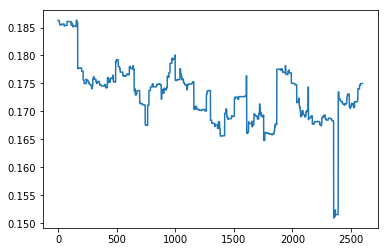

In [9]:
plt.plot(range(len(y_orig)), y_orig)